In [1]:
##################################################################
#           《Python人工智能编程实践（2024年度版）》开源代码
#-----------------------------------------------------------------
#            @章节号：6.7.3（自动编码器的PaddlePaddle实践）                                           
#            @作者：范淼、徐晟桐 
#            @购书链接：暂无
#            @电子邮箱：fm12@tsinghua.org.cn             
#            @官方交流QQ群号：561500762                        
##################################################################

In [2]:
import paddle
from paddle import nn, optimizer


#设置超参数。
INPUT_SIZE = 784 
HIDDEN_SIZE = 256
EPOCHS = 5
BATCH_SIZE = 64
LEARNING_RATE = 1e-3 


class AutoEncoder(nn.Layer):
    '''
    自定义自动编码器类，继承自nn.Layer。
    '''
    def __init__(self, input_size, hidden_size):
        
        super(AutoEncoder, self).__init__()
        
        self.l1 = nn.Linear(input_size, hidden_size) 
        
        self.relu = nn.ReLU()
        
        self.l2 = nn.Linear(hidden_size, input_size)  
        
        
    def forward(self, input_tensor):
        
        out = self.l1(input_tensor)
        
        out = self.relu(out)
        
        out = self.l2(out)
        
        return out 

    
#初始化自动编码器。
paddle_model = AutoEncoder(INPUT_SIZE, HIDDEN_SIZE)

model = paddle.Model(paddle_model)

#为模型训练做准备，设置优化器，损失函数和评估指标。
model.prepare(optimizer=optimizer.Adam(learning_rate=LEARNING_RATE, parameters=model.parameters()),
              loss=nn.MSELoss())

In [3]:
import pandas as pd


#使用pandas，读取fashion_mnist的训练和测试数据文件。
train_data = pd.read_csv('../datasets/fashion_mnist/fashion_mnist_train.csv')
test_data = pd.read_csv('../datasets/fashion_mnist/fashion_mnist_test.csv')

#从训练数据中，拆解出训练特征和类别标签。
X_train = train_data[train_data.columns[1:]]

#从测试数据中，拆解出测试特征和类别标签。
X_test = test_data[train_data.columns[1:]]

In [4]:
from sklearn.preprocessing import StandardScaler


#初始化数据标准化处理器。
ss = StandardScaler()

#标准化训练数据特征。
X_train = ss.fit_transform(X_train)

#标准化测试数据特征。
X_test = ss.transform(X_test)

In [5]:
from paddle.io import TensorDataset

X_train = paddle.to_tensor(X_train.astype('float32'))

#构建适用于PaddlePaddle模型训练的数据集。
train_dataset = TensorDataset([X_train, X_train])

#启动模型训练，指定训练数据集，设置训练轮次，设置每次数据集计算的批次大小。
model.fit(train_dataset, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1)

The loss value printed in the log is the current step, and the metric is the average value of previous steps.
Epoch 1/5
step 938/938 [==============================] - loss: 0.0991 - 9ms/step          
Epoch 2/5
step 938/938 [==============================] - loss: 0.0802 - 12ms/step          
Epoch 3/5
step 938/938 [==============================] - loss: 0.2499 - 12ms/step          
Epoch 4/5
step 938/938 [==============================] - loss: 0.0711 - 11ms/step          
Epoch 5/5
step 938/938 [==============================] - loss: 0.0602 - 9ms/step          


In [6]:
import numpy as np


test_sample = X_test[:1].reshape((28, 28))

reconstructed_features = model.predict(X_test[:1].astype('float32'))

reconstructed_sample = np.array(reconstructed_features[0]).reshape((28, 28))

Predict begin...
step 1/1 [==============================] - 867us/step
Predict samples: 784


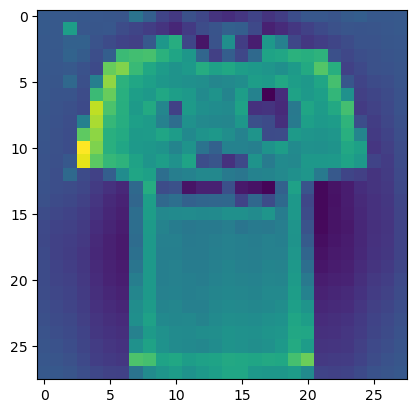

In [7]:
import matplotlib.pyplot as plt


plt.rcParams['figure.dpi'] = 100

#展示原始的图片。
plt.imshow(test_sample)

plt.show()

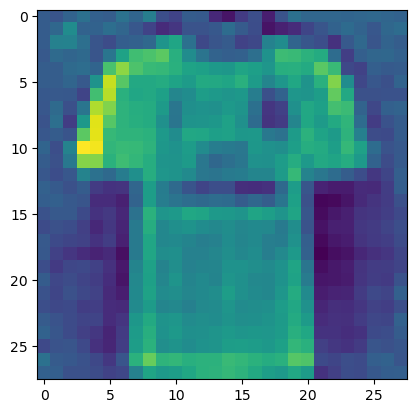

In [8]:
#展示自编码重建的图片。
plt.imshow(reconstructed_sample)

plt.show()